Scikit-learn implementation
---

In [1]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

# Create X/y arrays
X = iris['data'][:, [2, 3]] # Keep only petal features
y = iris['target']

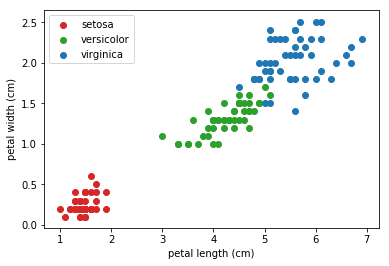

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data
setosa_idx = (y == 0) # Setosa points
versicolor_idx = (y == 1) # Versicolor points
virginica_idx = (y==2) # Virginica points

plt.scatter(X[:, 0][setosa_idx], X[:, 1][setosa_idx], c='C3', label='setosa')
plt.scatter(X[:, 0][versicolor_idx], X[:, 1][versicolor_idx], c='C2', label='versicolor')
plt.scatter(X[:, 0][virginica_idx], X[:, 1][virginica_idx], c='C0', label='virginica')

# Set labels
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create the estimator
logreg = make_pipeline(
    StandardScaler(), LogisticRegression(multi_class='ovr', solver='liblinear'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.800


In [5]:
# Create the estimator
logreg = make_pipeline(
    # C: inverse of regularization strength
    StandardScaler(), LogisticRegression(C=1000, multi_class='ovr', solver='liblinear'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.978


In [6]:
# New flower
new_flower = [
    5, # petal length (cm)
    1.5, # petal width (cm)
]

# Predict probabilities
logreg.predict_proba([new_flower])

array([[8.62023737e-08, 5.51329272e-01, 4.48670642e-01]])

In [7]:
# Predict class with highest probability
logreg.predict([new_flower])

array([1])

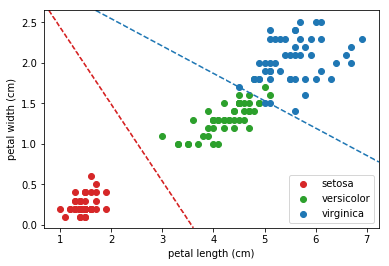

In [8]:
import numpy as np

# Helper function
def decision_boundaries(ax, X, y, logreg):
    # Plot data
    setosa_idx = (y == 0) # Setosa points
    versicolor_idx = (y == 1) # Versicolor points
    virginica_idx = (y==2) # Virginica points

    plt.scatter(X[:, 0][setosa_idx], X[:, 1][setosa_idx], c='C3', label='setosa')
    plt.scatter(X[:, 0][versicolor_idx], X[:, 1][versicolor_idx], c='C2', label='versicolor')
    plt.scatter(X[:, 0][virginica_idx], X[:, 1][virginica_idx], c='C0', label='virginica')

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    xpoints = np.linspace(*xlim, num=1000)
    ypoints = np.linspace(*ylim, num=1000)
    xx, yy = np.meshgrid(xpoints, ypoints)

    # Compute predictions
    preds = logreg.predict(np.c_[xx.flatten(), yy.flatten()])

    # Plot boundaries betwen classes 1-2 and 2-3
    zz = preds.reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[0.5, 1.5],
                colors=['C3', 'C0'], linestyles='dashed')

    # Add labels
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.legend(loc='lower right')
    plt.show()
    
# Plot boundaries
fig = plt.figure()
decision_boundaries(fig.gca(), X, y, logreg)

In [9]:
# Create the estimator
logreg = make_pipeline(
    StandardScaler(), LogisticRegression(multi_class='multinomial', solver='liblinear'))

# Fit it to train data
try:
    logreg.fit(X_tr, y_tr)
except Exception as e:
    print(e)

Solver liblinear does not support a multinomial backend.


In [10]:
# Create the estimator
logreg = make_pipeline(
    StandardScaler(), LogisticRegression(multi_class='multinomial', solver='saga'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.956


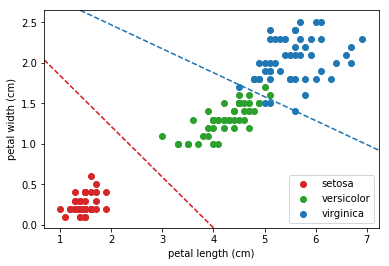

In [11]:
# Plot boundaries
fig = plt.figure()
decision_boundaries(fig.gca(), X, y, logreg)

In [12]:
# Create the estimator
logreg = make_pipeline(
    StandardScaler(), LogisticRegression(C=10, multi_class='multinomial', solver='saga'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.978


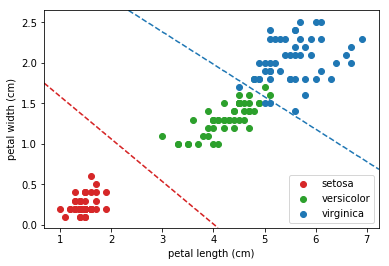

In [13]:
# Plot boundaries
fig = plt.figure()
decision_boundaries(fig.gca(), X, y, logreg)